In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
!unzip /content/drive/MyDrive/AFLW2000-3D.zip

Archive:  /content/drive/MyDrive/AFLW2000-3D.zip
replace AFLW2000/Code/DrawSolidHead.m? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [75]:
import numpy as np
import scipy.io as sio
import math
from math import cos, sin
import dlib
from pathlib import Path
import pandas as pd
from PIL import Image, ImageFilter
import os,cv2,math,glob,random
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow

In [76]:
def readFileImages(strFolderName):
    print (strFolderName)
    image_list = []
    st=strFolderName+"*.jpg"
    for filename in glob.glob(st): 
      im=Image.open(filename)
      image_list.append(filename)
    return image_list
image_list=readFileImages('/content/AFLW2000/')
print ( len(image_list))

/content/AFLW2000/
2000


In [77]:
x_all,y_all=[],[]
roll_all,pitch_all,yaw_all=[],[],[]
images=[]
for i in range(len(image_list)):
      x_points,y_points=[],[]
      mat_string=image_list[i].split('.')
      mat_file = sio.loadmat(mat_string[0]+'.mat')
      img_string=image_list[i].split('/')[3]
      img_name=img_string.split('.')[0]
      images.append(img_name)
      pt3d = mat_file['pt3d_68']
      x=pt3d[0]
      #x_points.append(x)
      y=pt3d[1]
      #y_points.append(y)
      x_all.append(x)
      y_all.append(y)
      pose_para = mat_file["Pose_Para"][0][:3]
      pitch = pose_para[0]
      yaw = pose_para[1]
      roll = pose_para[2]
      roll_all.append(roll)
      pitch_all.append(pitch)
      yaw_all.append(yaw)
#print(x_all[0],y_all[0],roll_all[0],pitch_all[0],yaw_all[0])
#print(len(x_all),len(y_all),len(roll_all),len(pitch_all),len(yaw_all))
print(images)

['image01842', 'image03552', 'image00328', 'image02016', 'image03782', 'image03452', 'image04221', 'image03936', 'image01974', 'image04171', 'image01262', 'image01077', 'image03761', 'image00334', 'image03575', 'image00392', 'image03462', 'image02117', 'image03555', 'image03196', 'image03498', 'image03372', 'image02666', 'image03713', 'image01829', 'image00503', 'image03802', 'image02971', 'image00159', 'image01319', 'image02389', 'image00670', 'image02529', 'image01782', 'image00084', 'image01155', 'image00264', 'image02373', 'image00974', 'image03797', 'image01218', 'image04344', 'image01033', 'image02351', 'image00357', 'image04236', 'image00187', 'image00587', 'image00175', 'image00021', 'image01662', 'image00788', 'image00710', 'image00528', 'image01294', 'image03574', 'image00134', 'image03670', 'image04248', 'image00416', 'image02312', 'image03754', 'image00333', 'image02721', 'image03541', 'image00190', 'image01249', 'image03721', 'image03061', 'image03440', 'image00183', 'imag

In [78]:
import pandas as pd
x_columns,y_columns=[],[]
for i in range(len(x_all[0])):
  x_str='x'+str(i)
  x_columns.append(x_str)
  y_str='y'+str(i)
  y_columns.append(y_str)
dfx = pd.DataFrame(x_all,columns=x_columns, dtype = float)
dfy = pd.DataFrame(y_all,columns=y_columns, dtype = float)
L_ang={'roll':roll_all,'pitch':pitch_all,'yaw':yaw_all,'image':images}
dfang = pd.DataFrame(L_ang, dtype = float)
df = pd.concat([dfx,dfy,dfang], axis=1, join='inner')
df=df.set_index('image')
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y61,y62,y63,y64,y65,y66,y67,roll,pitch,yaw
image,,,,,,,,,,,,,,,,,,,,,
image01842,0.209328,13.485157,29.507790,45.853359,71.975113,113.198471,159.882477,207.503922,247.766281,261.353668,...,335.948212,332.776062,335.269043,350.225525,352.872314,352.820679,352.735535,-0.263081,0.225152,-0.858014
image03552,115.027672,116.734138,122.471367,127.648964,136.596802,150.217789,165.914291,186.910767,221.771561,257.700897,...,314.272003,316.256104,316.603760,311.895447,330.121918,330.999939,326.710938,0.067926,-0.331075,0.014285
image00328,107.138824,108.996422,114.203796,120.378227,130.571381,147.022003,166.173553,188.738541,221.432999,252.577942,...,318.439575,318.148712,318.855530,315.439423,322.611053,323.204681,321.956299,0.042692,-0.252363,-0.085357
image02016,119.133202,116.952232,115.667694,117.001114,125.727219,144.973145,169.057953,194.483734,215.243103,222.111664,...,286.697632,289.402924,291.280792,296.308258,297.838684,296.334442,293.874146,0.431792,-0.324275,-1.004428
image03782,274.634247,276.374115,279.115662,279.984009,276.514435,267.994995,255.230392,244.658142,245.893753,259.575073,...,317.112549,312.651276,308.679321,304.283875,313.751068,318.612122,322.196381,-0.406230,0.154073,1.170950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
image04299,299.618713,298.922638,299.450104,297.138153,289.412842,273.281677,252.553757,230.763397,225.863342,239.274155,...,329.984375,327.763855,326.148804,322.638824,320.116455,321.971619,324.396484,-0.333509,-0.094925,1.337959
image03980,115.974213,118.377625,122.994461,127.442085,134.893036,150.516479,168.443329,192.707565,227.183212,259.531006,...,306.421661,306.513489,305.844238,305.221313,321.115204,322.699890,320.999268,0.001859,-0.095902,-0.078198
image00804,101.645615,104.559196,110.318764,117.388039,128.457382,147.317993,169.843460,195.872192,229.234055,257.492493,...,313.683228,314.910217,315.946594,317.973602,319.811829,319.126617,317.857147,0.039515,-0.041509,-0.216011


In [127]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
from sklearn.metrics import r2_score
x=df.drop(['roll','pitch','yaw'],axis=1).to_numpy()
y=df[['roll','pitch','yaw']].to_numpy()
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
y_roll=x_train[:,0]
y_pitch=x_train[:,1]
y_yaw=x_train[:,2]
parameters={
    "n_estimators":1000,
    "learning_rate":0.001,
    "max_depth":5,
    "subsample":0.1,
    "colsample_bytree":0.8,
    "nthread":6,
    "seed":42
}
reg_roll3=XGBRFRegressor(**parameters).fit(x_train,y_roll)
reg_pitch3=XGBRFRegressor(**parameters).fit(x_train,y_pitch)
reg_yaw3=XGBRFRegressor(**parameters).fit(x_train,y_yaw)

[00:15:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:15:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:15:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [114]:
class CombinedModel:
    def __init__(self, model1, model2,model3):
        self.model1= model1
        self.model2= model2
        self.model3= model3
        
    def predict(self, X, **kwargs):
        #ser_model1= X['x']==0.0
        result=[]
        result.append(self.model1.predict(X))
        result.append(self.model2.predict(X))
        result.append(self.model3.predict(X))
        return result
#model= CombinedModel(reg_roll,reg_pitch,reg_yaw)
model3= CombinedModel(reg_roll3,reg_pitch3,reg_yaw3)
#reg_roll.predict(x[0])

In [82]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2022-06-17 22:53:21--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2.1’

shape_predictor_68_ 100%[===================>]  61.07M   178MB/s    in 0.3s    

2022-06-17 22:53:21 (178 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2.1’ saved [64040097/64040097]



In [83]:
!wget http://arunponnusamy.com/files/mmod_human_face_detector.dat

--2022-06-17 22:53:26--  http://arunponnusamy.com/files/mmod_human_face_detector.dat
Resolving arunponnusamy.com (arunponnusamy.com)... 185.199.111.153, 185.199.110.153, 185.199.108.153, ...
Connecting to arunponnusamy.com (arunponnusamy.com)|185.199.111.153|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.arunponnusamy.com/files/mmod_human_face_detector.dat [following]
--2022-06-17 22:53:26--  https://www.arunponnusamy.com/files/mmod_human_face_detector.dat
Resolving www.arunponnusamy.com (www.arunponnusamy.com)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to www.arunponnusamy.com (www.arunponnusamy.com)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 729940 (713K) [application/octet-stream]
Saving to: ‘mmod_human_face_detector.dat.2’

mmod_human_face_det 100%[===================>] 712.83K  --.-KB/s    in 0.007s  

2022-06-17 22:53:26 (94.2 MB/s) - ‘mmod_human_face_de

In [84]:
!bzip2 -d  '/content/shape_predictor_68_face_landmarks.dat.bz2'

bzip2: Output file /content/shape_predictor_68_face_landmarks.dat already exists.


In [85]:
predictor=dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')
cnn_face_detector = dlib.get_frontal_face_detector()

In [86]:
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):

    pitch = pitch * np.pi / 180
    yaw = -(yaw * np.pi / 180)
    roll = roll * np.pi / 180

    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

[0.04511004686355591, -0.08366979658603668, -0.09809946268796921] [array([0.6430055], dtype=float32), array([0.6844023], dtype=float32), array([0.66048926], dtype=float32)]


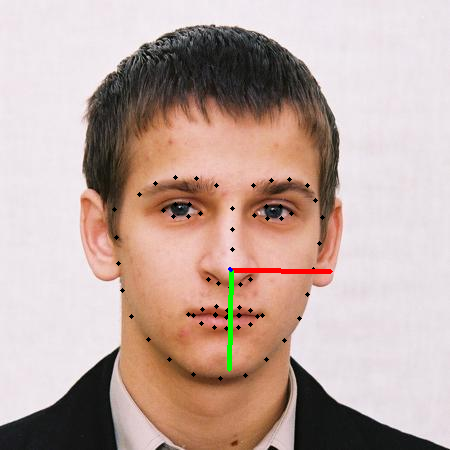

In [87]:
face_detector=dlib.get_frontal_face_detector()
landmark_detector=dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
image='/content/AFLW2000/image00053.jpg'
img=dlib.load_rgb_image(image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
faces=face_detector(img,1)
landmark_list=[]
for k,d in enumerate(faces):
  landmarks=landmark_detector(img,d)
  for n in range(0,68):
    x=landmarks.part(n).x
    y=landmarks.part(n).y
    landmark_list.append([x,y])
    cv2.circle(img,(x,y),2,(0,0,0) ,-1)
  angles=[df.loc['image00053','roll'],df.loc['image00053','pitch'],df.loc['image00053','yaw']]
  flat_list = [x for xs in landmark_list for x in xs]
  data=np.array(flat_list)
  data=np.reshape(data,(1,-1))
  nose_point=landmark_list[30]
  angles_predict=model3.predict(data)
  print(angles,angles_predict)
  #cv2_imshow(draw_axis(img,angles[0],angles[1] ,angles[2]
                                # ,nose_point[0],nose_point[1]))
  cv2_imshow(draw_axis(img,angles_predict[0],angles_predict[1] ,angles_predict[2]
                                ,nose_point[0],nose_point[1]))

In [115]:
def put_predicted_axis(image):
  face_detector=dlib.get_frontal_face_detector()
  landmark_detector=dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
  img=dlib.load_rgb_image(image)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  faces=face_detector(img,1)
  landmark_list=[]
  for k,d in enumerate(faces):
    landmarks=landmark_detector(img,d)
    for n in range(0,68):
      x=landmarks.part(n).x
      y=landmarks.part(n).y
      landmark_list.append([x,y])
      cv2.circle(img,(x,y),2,(0,0,0) ,-1)
    flat_list = [x for xs in landmark_list for x in xs]
    data=np.array(flat_list)
    data=np.reshape(data,(1,-1))
    nose_point=landmark_list[30]
    angles_predict=model3.predict(data)
  return draw_axis(img,angles_predict[0],angles_predict[1] ,angles_predict[2]
                                ,nose_point[0],nose_point[1])

In [ ]:
import cv2
import os 
video_path='/content/drive/MyDrive/ml_test1.mp4'
# Opens the inbuilt camera of laptop to capture video.
cap = cv2.VideoCapture(video_path)
i = 0
#directory='/content/drive/MyDrive/ML1_project'
while(cap.isOpened()):
    ret, frame = cap.read()
    # This condition prevents from infinite looping
    # incase video ends.
    if ret == False:
        break
     
    # Save Frame by Frame into disk using imwrite method
    #cv2.imwrite(os.path.join(directory , 'Frame'+str(i)+'.jpg'), frame)

    
    i += 1
 
cap.release()
cv2.destroyAllWindows()

In [117]:
folder='/content/drive/MyDrive/ML1_project/'
frames_list=readFileImages(folder)
print(frames_list)
out_images=[]
for i in range(len(frames_list)):
  print(i)
  out_img=put_predicted_axis(frames_list[i])
  out_images.append(out_img)

/content/drive/MyDrive/ML1_project/
['/content/drive/MyDrive/ML1_project/Frame0.jpg', '/content/drive/MyDrive/ML1_project/Frame1.jpg', '/content/drive/MyDrive/ML1_project/Frame2.jpg', '/content/drive/MyDrive/ML1_project/Frame3.jpg', '/content/drive/MyDrive/ML1_project/Frame4.jpg', '/content/drive/MyDrive/ML1_project/Frame5.jpg', '/content/drive/MyDrive/ML1_project/Frame6.jpg', '/content/drive/MyDrive/ML1_project/Frame7.jpg', '/content/drive/MyDrive/ML1_project/Frame8.jpg', '/content/drive/MyDrive/ML1_project/Frame9.jpg', '/content/drive/MyDrive/ML1_project/Frame10.jpg', '/content/drive/MyDrive/ML1_project/Frame11.jpg', '/content/drive/MyDrive/ML1_project/Frame12.jpg', '/content/drive/MyDrive/ML1_project/Frame13.jpg', '/content/drive/MyDrive/ML1_project/Frame14.jpg', '/content/drive/MyDrive/ML1_project/Frame15.jpg', '/content/drive/MyDrive/ML1_project/Frame16.jpg', '/content/drive/MyDrive/ML1_project/Frame17.jpg', '/content/drive/MyDrive/ML1_project/Frame18.jpg', '/content/drive/MyDrive

In [123]:
for i in range(len(out_images)):
  cv2.imwrite('/content/drive/MyDrive/ML1_project2/pic'+str(i)+'.jpg',out_images[i])

In [126]:
import cv2
import numpy as np 
import glob 

img_array=[]
for filename in glob.glob('/content/drive/MyDrive/ML1_project2/*.jpg'):
  img=cv2.imread(filename)
  height,width,layers=img.shape
  size=(width,height)
  img_array.append(img)
out=cv2.VideoWriter('/content/drive/MyDrive/ML1_out_video/ml1_out_video.mp4',
                    cv2.VideoWriter_fourcc(*'DIVX'),15,size)
for i in range(len(img_array)):
  out.write(img_array[i])
out.release()